Installing the Libraries

In [1]:
%pip install imbalanced-learn -U
%pip install keras-tuner
%pip install tensorflow
%pip install openpyxl
%pip install pandas
%pip install seaborn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------------------------------- -------- 204.8/258.3 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   --------------------------------- ------ 256.0/301.8 kB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.9 MB 7.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.9 MB 7.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.9 MB 7.8 MB/s eta 0:00:02
   ----- ---

Importing Libraries

In [2]:
import pandas as pd #data processing
import numpy as np #calculations
from itertools import chain
import scipy.stats as stats
import scipy.stats as skew
import matplotlib.pyplot as plt #plotting
import seaborn as sns #data visualization
from sklearn.preprocessing import MinMaxScaler #machine learning lib
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
# from xgboost import XGBClassifier

In [3]:
s_data = pd.read_excel("data\\newdataset_round.xlsx") #path depends on the location
s_data

,DOY,Rel_Hum,Precipit,Temp,Inso_Clear,Zenith Angle,Gen per kW
0,6,83.9,1.9,25.3,0.6,-13.1,4.0
1,7,83.9,0.9,25.1,0.6,-13.2,4.0
2,8,80.7,0.0,24.5,0.6,-13.3,4.0
3,9,78.9,0.0,24.2,0.6,-13.4,4.5
4,10,84.1,0.8,24.7,0.6,-13.4,3.5
...,...,...,...,...,...,...,...
21347,54,81.1,0.6,27.0,0.7,-14.3,4.5
21348,55,80.6,0.3,27.0,0.7,-14.2,5.0
21349,56,78.4,0.2,27.1,0.7,-14.2,5.0
21350,57,74.6,0.2,27.2,0.7,-14.1,5.0


In [4]:
s_data.dropna()
display(s_data)
s_data.shape

,DOY,Rel_Hum,Precipit,Temp,Inso_Clear,Zenith Angle,Gen per kW
0,6,83.9,1.9,25.3,0.6,-13.1,4.0
1,7,83.9,0.9,25.1,0.6,-13.2,4.0
2,8,80.7,0.0,24.5,0.6,-13.3,4.0
3,9,78.9,0.0,24.2,0.6,-13.4,4.5
4,10,84.1,0.8,24.7,0.6,-13.4,3.5
...,...,...,...,...,...,...,...
21347,54,81.1,0.6,27.0,0.7,-14.3,4.5
21348,55,80.6,0.3,27.0,0.7,-14.2,5.0
21349,56,78.4,0.2,27.1,0.7,-14.2,5.0
21350,57,74.6,0.2,27.2,0.7,-14.1,5.0


(21352, 7)

(21352, 7)


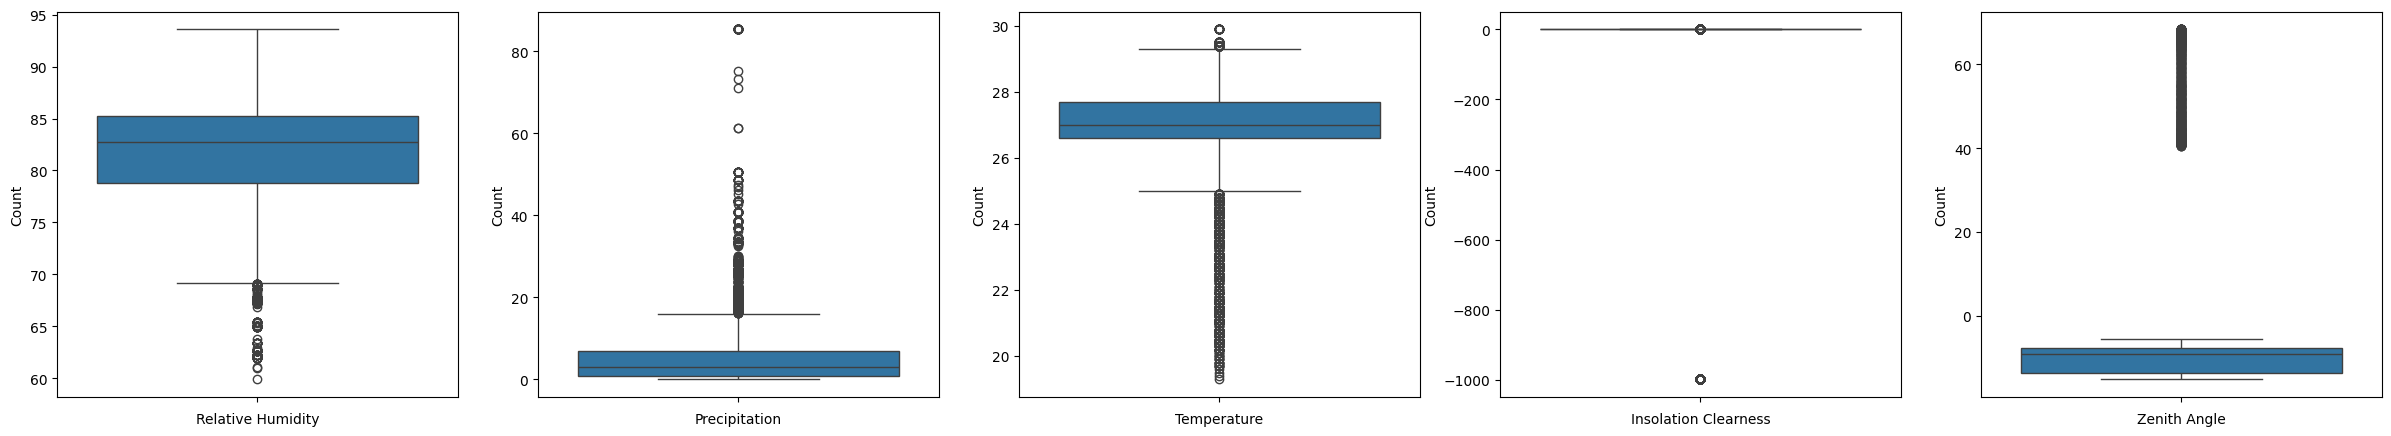

In [5]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=[30, 5])

plt.subplot(1,5,1)
sns.boxplot(s_data['Rel_Hum'])
plt.xlabel('Relative Humidity')
plt.ylabel('Count')

plt.subplot(1,5,2)
sns.boxplot(s_data['Precipit'])
plt.xlabel('Precipitation')
plt.ylabel('Count')

plt.subplot(1,5,3)
sns.boxplot(s_data['Temp'])
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.subplot(1,5,4)
sns.boxplot(s_data['Inso_Clear'])
plt.xlabel('Insolation Clearness')
plt.ylabel('Count')

plt.subplot(1,5,5)
sns.boxplot(s_data['Zenith Angle'])
plt.xlabel('Zenith Angle')
plt.ylabel('Count')

plt.show

print(s_data.shape)

In [6]:
def remove_outliers_zscore_all_columns(df, threshold=2.5):

    filtered_df = df.copy()

    for column_name in df.columns:
        if np.issubdtype(df[column_name].dtype, np.number):  # Check if the column contains numerical values
            z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
            filtered_df = filtered_df[z_scores < threshold]

    return filtered_df

C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\923956306.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[z_scores < threshold]
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\923956306.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[z_scores < threshold]
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\923956306.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[z_scores < threshold]
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\923956306.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[z_scores < threshold]
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\923956306.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[z_scores < threshold]


(18093, 7)


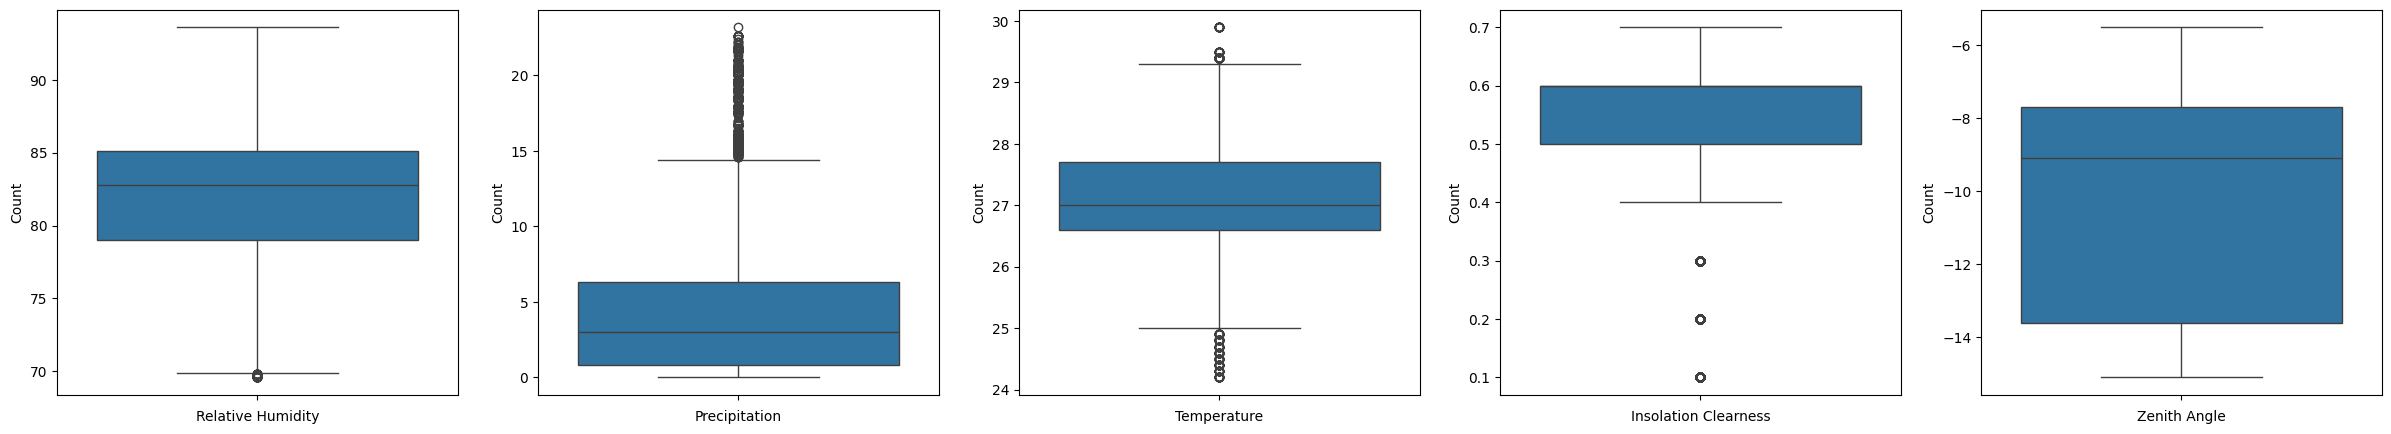

In [7]:
s_data_v1 = remove_outliers_zscore_all_columns(s_data)
s_data_v1.shape

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=[30, 5])

plt.subplot(1,5,1)
sns.boxplot(s_data_v1['Rel_Hum'])
plt.xlabel('Relative Humidity')
plt.ylabel('Count')

plt.subplot(1,5,2)
sns.boxplot(s_data_v1['Precipit'])
plt.xlabel('Precipitation')
plt.ylabel('Count')

plt.subplot(1,5,3)
sns.boxplot(s_data_v1['Temp'])
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.subplot(1,5,4)
sns.boxplot(s_data_v1['Inso_Clear'])
plt.xlabel('Insolation Clearness')
plt.ylabel('Count')

plt.subplot(1,5,5)
sns.boxplot(s_data_v1['Zenith Angle'])
plt.xlabel('Zenith Angle')
plt.ylabel('Count')

plt.show

print(s_data_v1.shape)

DOY
0.2676101366684357
1
Rel_Hum
-0.6249649521368887
2


C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\2149289834.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[j])
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\2149289834.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[j])


Precipit
1.5561591719430445
3
Temp
0.03331877159922592
4


C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\2149289834.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[j])
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\2149289834.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[j])


Inso_Clear
-1.295609064365603
5
Zenith Angle
-0.30342678882197316
6


C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\2149289834.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[j])
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\2149289834.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[j])


Gen per kW
-0.436067195355073


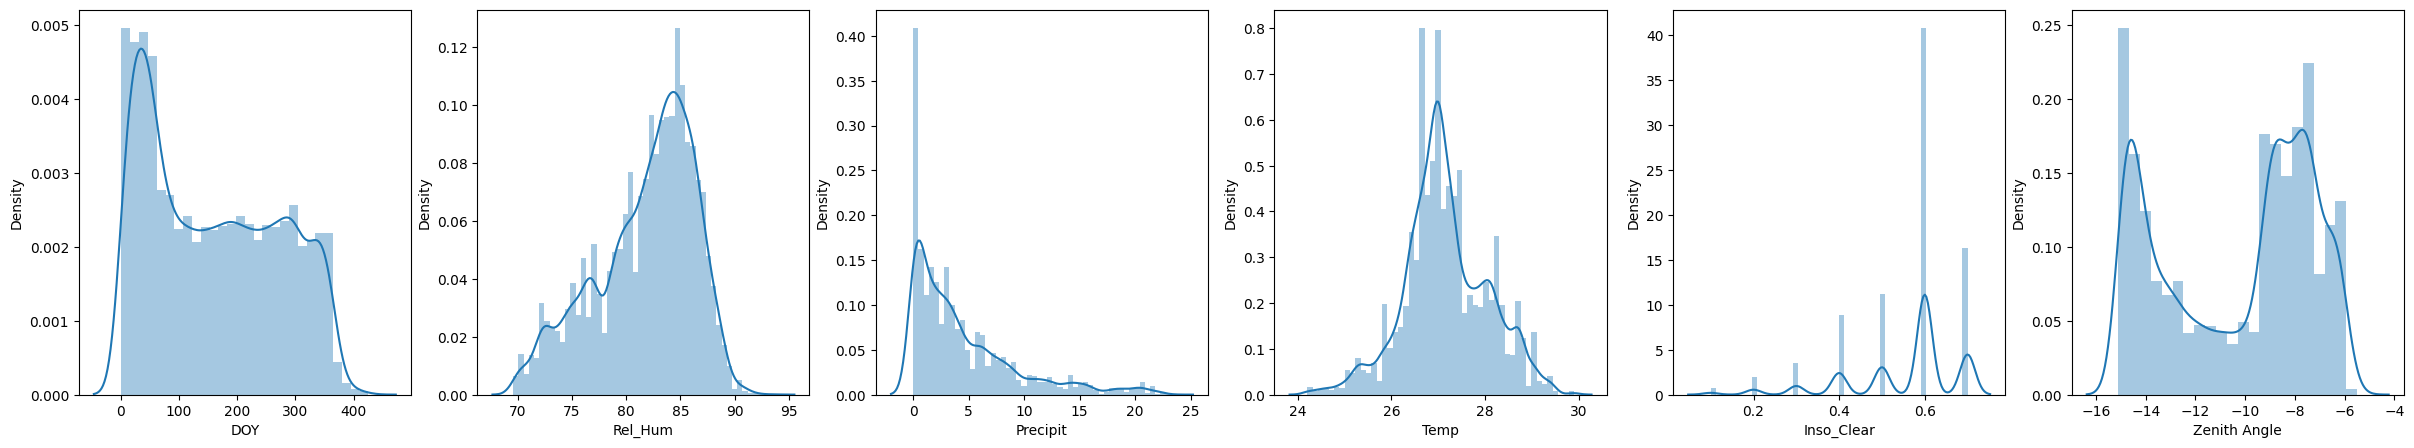

In [8]:
count = 0
plt.figure(figsize=[30, 5])

for j in s_data_v1:
 print(j)
 print(skew.skew(s_data_v1[j]))
 if count<6:
  count=count+1
  print(count)
  plt.subplot(1,6,count)
  sns.distplot(s_data_v1[j])

 plt.show

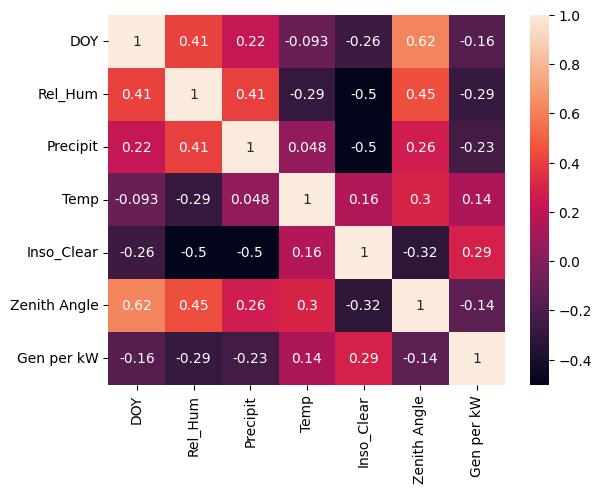

In [9]:
sns.heatmap(s_data_v1.corr(),annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

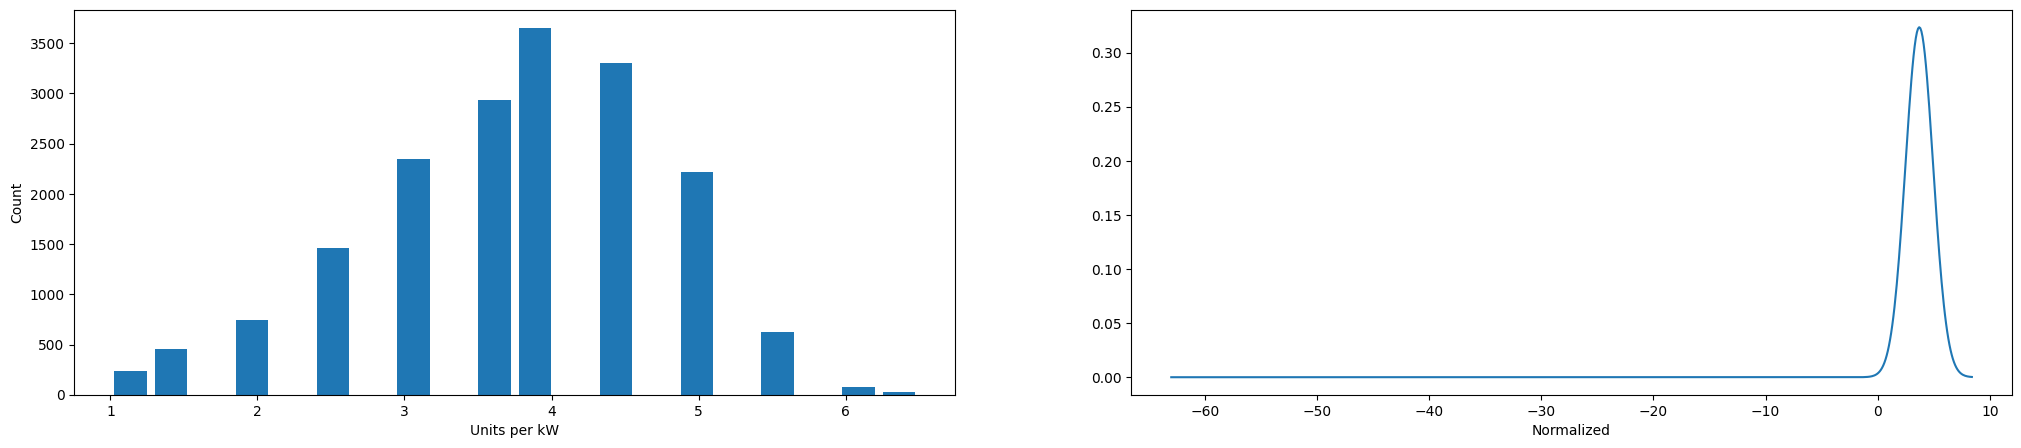

In [10]:
plt.figure(figsize=[25, 5])

plt.subplot(1,2,1)
plt.hist(s_data_v1['Gen per kW'], bins=20, rwidth=0.8)
plt.xlabel('Units per kW')
plt.ylabel('Count')

plt.subplot(1,2,2)
rng = np.arange(s_data['Gen per kW'].min(), s_data['Gen per kW'].max(), 0.1)
plt.plot(rng, stats.norm.pdf(rng,s_data['Gen per kW'].mean(),s_data['Gen per kW'].std()))
plt.xlabel('Normalized')

plt.show

DOY
Square rooting DOY
1
-0.23479815972129464
Rel_Hum
2
-0.6249649521368887


C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\867242677.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[t])
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\867242677.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[t])


Precipit
Square rooting Precipit
3
0.41263204409376186
Temp
4
0.03331877159922592


C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\867242677.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[t])
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\867242677.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[t])


Inso_Clear
5
-1.295609064365603
Zenith Angle
Square rooting Zenith Angle
6
-0.19555904798564838


C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\867242677.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_data_v1[t])
c:\Users\Sahan PC\OneDrive - TU Eindhoven\MBA MOT UOM\code\myenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Sahan PC\AppData\Local\Temp\ipykernel_169684\867242677.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function fo

Gen per kW
<class 'str'>


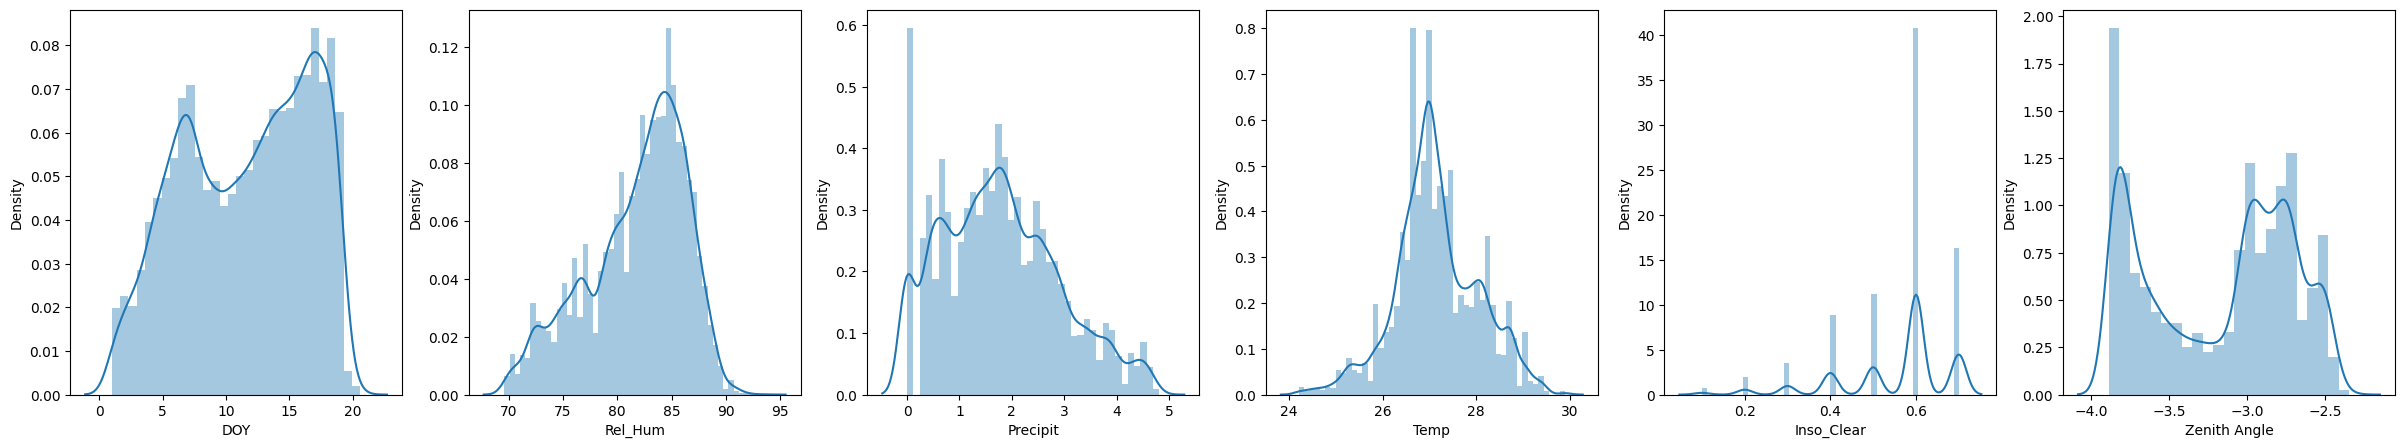

In [11]:
from scipy.stats import boxcox

#sqrt trans for features
count = 0
i = 0
plt.figure(figsize=[30, 5])
for t in s_data_v1:
  print(t)
  if (t == "Precipit" or t== "DOY" or t == "Zenith Angle"):
    print('Square rooting '+ t)
    while i<1:
      s_data_v1[t] = np.where(s_data_v1[t] < 0, -1 * np.sqrt(np.abs(s_data_v1[t])), np.sqrt(s_data_v1[t]))
      i+=1
  i = 0

  if count<6:
   count=count+1
   print(count)
   plt.subplot(1,6,count)
   print(skew.skew(s_data_v1[t]))
   sns.distplot(s_data_v1[t])
   plt.show

print(type(t))

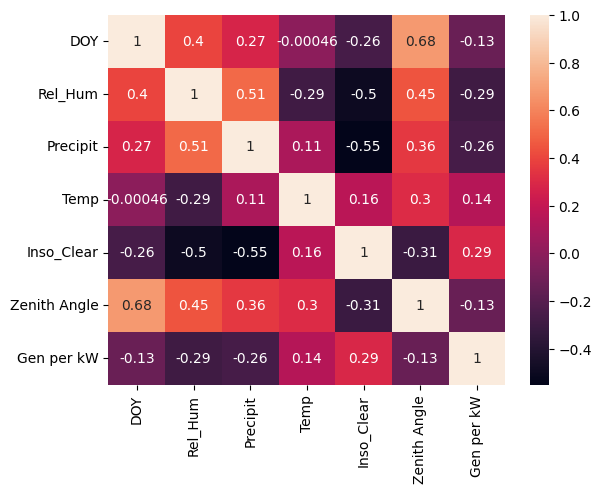

            DOY  Rel_Hum  Precipit  Temp  Inso_Clear  Zenith Angle  Gen per kW
0      2.449490     83.9  1.378405  25.3         0.6     -3.619392         4.0
1      2.645751     83.9  0.948683  25.1         0.6     -3.633180         4.0
2      2.828427     80.7  0.000000  24.5         0.6     -3.646917         4.0
3      3.000000     78.9  0.000000  24.2         0.6     -3.660601         4.5
4      3.162278     84.1  0.894427  24.7         0.6     -3.660601         3.5
...         ...      ...       ...   ...         ...           ...         ...
21347  7.348469     81.1  0.774597  27.0         0.7     -3.781534         4.5
21348  7.416198     80.6  0.547723  27.0         0.7     -3.768289         5.0
21349  7.483315     78.4  0.447214  27.1         0.7     -3.768289         5.0
21350  7.549834     74.6  0.447214  27.2         0.7     -3.754997         5.0
21351  7.615773     72.4  0.632456  27.0         0.6     -3.741657         5.0

[18093 rows x 7 columns]


In [12]:
sns.heatmap(s_data_v1.corr(),annot=True)
plt.show()
print(s_data_v1)

In [13]:
#Scaling Data
import openpyxl as xls
scaled_data = s_data_v1.copy()

TargetVariable=['Gen per kW']
Predictors=['DOY', 'Rel_Hum', 'Precipit', 'Temp', 'Inso_Clear', 'Zenith Angle']

scaled_data['Gen per kW'].value_counts()

X=scaled_data[Predictors].values
y=scaled_data[TargetVariable].values

y = y.round(0)


print(X)
print(scaled_data['Gen per kW'].value_counts())

[[ 2.44948974 83.9         1.37840488 25.3         0.6        -3.61939221]
 [ 2.64575131 83.9         0.9486833  25.1         0.6        -3.63318042]
 [ 2.82842712 80.7         0.         24.5         0.6        -3.64691651]
 ...
 [ 7.48331477 78.4         0.4472136  27.1         0.7        -3.76828874]
 [ 7.54983444 74.6         0.4472136  27.2         0.7        -3.75499667]
 [ 7.61577311 72.4         0.63245553 27.          0.6        -3.74165739]]
Gen per kW
4.0    3651
4.5    3307
3.5    2935
3.0    2351
5.0    2215
2.5    1459
2.0     747
5.5     628
1.5     459
1.0     236
6.0      73
6.5      32
Name: count, dtype: int64


In [14]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

print(X.shape, y.shape)
print(X, y)

(18093, 6) (18093, 1)
[[-1.82364655  0.46948878 -0.35739716 -2.07072533  0.33124343 -0.95076247]
 [-1.78443885  0.46948878 -0.73969788 -2.29435803  0.33124343 -0.98037539]
 [-1.74794521 -0.23728044 -1.5836916  -2.96525613  0.33124343 -1.00987636]
 ...
 [-0.81802578 -0.74527083 -1.18582915 -0.05803104  1.13279315 -1.27054735]
 [-0.80473697 -1.58455928 -1.18582915  0.05378531  1.13279315 -1.24199999]
 [-0.79156422 -2.07046313 -1.02102912 -0.16984739  0.33124343 -1.21335123]] [[4.]
 [4.]
 [4.]
 ...
 [5.]
 [5.]
 [5.]]


In [15]:
ohe = OneHotEncoder()
ohe_y = ohe.fit_transform(y)
print(ohe_y.shape)
print(ohe_y)

(18093, 6)
  (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 3)	1.0
  (17, 3)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 3)	1.0
  (21, 3)	1.0
  (22, 3)	1.0
  (23, 3)	1.0
  (24, 3)	1.0
  :	:
  (18068, 3)	1.0
  (18069, 4)	1.0
  (18070, 4)	1.0
  (18071, 3)	1.0
  (18072, 2)	1.0
  (18073, 3)	1.0
  (18074, 4)	1.0
  (18075, 3)	1.0
  (18076, 5)	1.0
  (18077, 4)	1.0
  (18078, 3)	1.0
  (18079, 3)	1.0
  (18080, 3)	1.0
  (18081, 3)	1.0
  (18082, 3)	1.0
  (18083, 3)	1.0
  (18084, 3)	1.0
  (18085, 3)	1.0
  (18086, 4)	1.0
  (18087, 4)	1.0
  (18088, 3)	1.0
  (18089, 4)	1.0
  (18090, 4)	1.0
  (18091, 4)	1.0
  (18092, 4)	1.0


In [16]:
ohe.categories_

[array([1., 2., 3., 4., 5., 6.])]

In [17]:
from imblearn.over_sampling import SMOTE

y_corr = ohe_y.toarray()

smote = SMOTE(random_state=12, sampling_strategy = 'auto')
X_sm, y_sm = smote.fit_resample(X,y_corr)

print(X_sm.shape, y_sm.shape)

(59358, 6) (59358, 6)


In [18]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47486, 6)
(47486, 6)
(11872, 6)
(11872, 6)


In [19]:
import numpy as np

in_shape = list(X_train.shape)
print(type(in_shape))

x_shape=(X_train.shape[0],6)
xtest_shape=(X_test.shape[0],6)

X_train = X_train.reshape(x_shape)
X_train = X_train.round(2)
X_test = X_test.reshape(xtest_shape)
X_test = X_test.round(2)
y_train = y_train.reshape(X_train.shape[0],y_train.shape[1])
y_test = y_test.reshape(X_test.shape[0],y_train.shape[1])

print(X_train)
print(y_train)

print(X_train.shape)
print(y_train.shape)

<class 'list'>
[[-1.54  0.69  1.34 -0.84  0.33 -1.27]
 [-0.49 -2.2  -0.42  1.4   0.33 -0.57]
 [ 1.19 -0.15 -0.02  0.39  0.33  0.94]
 ...
 [ 1.11  0.12 -0.89 -0.51  0.33  0.71]
 [-1.08 -0.94 -1.58 -1.51  1.13 -1.47]
 [ 0.16  0.71 -0.25 -0.19  0.33  0.97]]
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]]
(47486, 6)
(47486, 6)


In [20]:
from keras.optimizers import Adam

# hp = keras_tuner.HyperParameters()

# def generate_unique_name(counter, base_name):
#     counter = 0
#     unique_name = base_name
#     unique_name = f"{base_name}_{counter}"
#     counter += 1
#     return unique_name

# def prepare_data(data):
#     # Reshape data as needed
#     print("Data shape -> ", data.shape)
#     return np.reshape(data, (data.shape[0], 1, data.shape[1]))

# def build_model(hp):
#     model = Sequential()

#     model.add(Conv1D(24, 2, activation='relu', input_shape=(6,1)))
#     # ann = model.add(Activation('relu'))
#     model.add(Conv1D(36, 2, activation='relu'))
#     model.add(Conv1D(48, 2, activation='relu'))
#     model.add(MaxPooling1D(pool_size=1))

#     model.add(Flatten())

#     # ann = model.add(Conv1D(16, 3, activation='relu', input_shape=(4,1)))
#     # # ann = model.add(Activation('relu'))
#     # ann = model.add(Conv1D(32, 2, activation='relu'))
#     # ann = model.add(MaxPooling1D(pool_size=1))

#     # ann = model.add(Flatten())
#     # ann = model.add(Dense(100, activation='relu'))
#     # ann = model.add(Dense(500, activation='relu'))
#     # ann = model.add(Dense(500, activation='relu'))
#     # ann = model.add(Dense(y_train.shape[1], activation='softmax'))

#     # ann = model.compile(loss='categorical_crossentropy',
#     #               optimizer='adam',
#     #               metrics=['accuracy'])

#     print('First point')

#     min1 = 400
#     max1 = 400
#     min2 = 400
#     max2 = 400
#     min3 = 400
#     max3 = 400


#     # # # First Hidden Layer with tunable neuron count
#     model.add(Dense(units=hp.Int(name='units_1', min_value=min1, max_value=max1, step=50,), activation='relu', input_shape=(6,), name='input_layer'))
#     # model.add(Dropout(0.1))

#     # Second Hidden Layer with tunable neuron count
#     model.add(Dense(units=hp.Int(name='units_2', min_value=min2, max_value=max2, step=50), activation='relu', name='x1_layer'))
#     # model.add(Dropout(0.1))

#     # Third Hidden Layer with tunable neuron count
#     model.add(Dense(units=hp.Int(name='units_3', min_value=min3, max_value=max3, step=50), activation='relu', name='x2_layer'))
#     # model.add(Dropout(0.1))

#     # Output Layer
#     model.add(Dense(6, activation='softmax', name='out_layer'))

#     # Compile model
#     model.compile(
#         # optimizer=SGD(lr=learning_rate),
#         optimizer = Adam(learning_rate),
#         # optimizer='adam',
#         loss='categorical_crossentropy',
#         metrics=['accuracy'])

#     return model

# # This will override the `learning_rate` parameter with your
# # own selection of choices
# learning_rate = hp.Float(name="learning_rate", min_value=1e-3, max_value=1e-1, sampling="log")

# X_train_reshaped = prepare_data(X_train)
# X_test_reshaped = prepare_data(X_test)
# y_train_reshaped = prepare_data(y_train)
# y_test_reshaped = prepare_data(y_test)

# tuner = keras_tuner.RandomSearch(
#     hypermodel=build_model,
#     hyperparameters=hp,
#     # Prevents unlisted parameters from being tuned
#     # tune_new_entries=False,
#     objective="val_accuracy",
#     max_trials=50,
#     overwrite=True,
#     directory="Helloworld",
#     project_name="search_a_few",
# )

# # # Print a summary of the search space
# tuner.search_space_summary()

# print(X_train.shape, X_test.shape)

# # Start the search for the best hyperparameters
# tuner.search(X_train, y_train, epochs=15, validation_data=(X_test,y_test), verbose=1)

# # Get the best hyperparameters
# best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
# print("Best Hyperparameters:", best_hps)

# # Step 6: Build and compile the model with the best hyperparameters
# model = tuner.hypermodel.build(best_hps)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Step 7: Fit the model
# model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32)


In [21]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")



TensorFlow version: 2.16.1
Keras version: 3.3.3


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from tensorflow.python.keras.utils import to_categorical

model = Sequential()

ann = model.add(Conv1D(24, 2, activation='relu', input_shape=(6,1)))

ann = model.add(Conv1D(36, 2, activation='relu'))
ann = model.add(Conv1D(48, 2, activation='relu'))
ann = model.add(MaxPooling1D(pool_size=1))

ann = model.add(Flatten())

ann = model.add(Dense(400, activation='relu'))
ann = model.add(Dense(400, activation='relu'))
ann = model.add(Dense(400, activation='relu'))
ann = model.add(Dense(6, activation='softmax'))

ann = model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print(X_train.shape)
print(y_train.shape)

ann = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_data=(X_test,y_test), verbose=2)

c:\Users\Sahan PC\OneDrive - TU Eindhoven\MBA MOT UOM\code\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 5, 24)          │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 36)          │         1,764 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 48)          │         3,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 48)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │        58,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         2,406 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 386,546 (1.47 MB)

 Trainable params: 386,546 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

(47486, 6)
(47486, 6)
Epoch 1/100
1188/1188 - 4s - 3ms/step - accuracy: 0.3825 - loss: 1.4731 - val_accuracy: 0.4431 - val_loss: 1.3234
Epoch 2/100
1188/1188 - 2s - 2ms/step - accuracy: 0.4826 - loss: 1.2518 - val_accuracy: 0.5083 - val_loss: 1.1893
Epoch 3/100
1188/1188 - 2s - 2ms/step - accuracy: 0.5390 - loss: 1.1229 - val_accuracy: 0.5542 - val_loss: 1.1088
Epoch 4/100
1188/1188 - 2s - 2ms/step - accuracy: 0.5719 - loss: 1.0438 - val_accuracy: 0.5815 - val_loss: 1.0261
Epoch 5/100
1188/1188 - 2s - 2ms/step - accuracy: 0.5967 - loss: 0.9879 - val_accuracy: 0.5827 - val_loss: 1.0147
Epoch 6/100
1188/1188 - 2s - 2ms/step - accuracy: 0.6112 - loss: 0.9498 - val_accuracy: 0.6076 - val_loss: 0.9502
Epoch 7/100
1188/1188 - 2s - 2ms/step - accuracy: 0.6236 - loss: 0.9171 - val_accuracy: 0.6135 - val_loss: 0.9463
Epoch 8/100
1188/1188 - 2s - 2ms/step - accuracy: 0.6319 - loss: 0.8953 - val_accuracy: 0.6153 - val_loss: 0.9419
Epoch 9/100
1188/1188 - 2s - 2ms/step - accuracy: 0.6384 - loss: 0

Saving the model as a .h5 file

In [24]:
model.save('models/solargenpred_model75_2.h5')


Evaluate Training and Testing Data

In [25]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=2)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')

# Evaluate on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

1484/1484 - 1s - 814us/step - accuracy: 0.7469 - loss: 0.5907
Training Accuracy: 74.69%
371/371 - 0s - 834us/step - accuracy: 0.6916 - loss: 0.8999
Testing Accuracy: 69.16%


Make Predictions

In [26]:
# Predict on test data
predictions = model.predict(X_test)

# Convert predictions and actuals from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)

371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


Plot Test Predictions vs Actuals

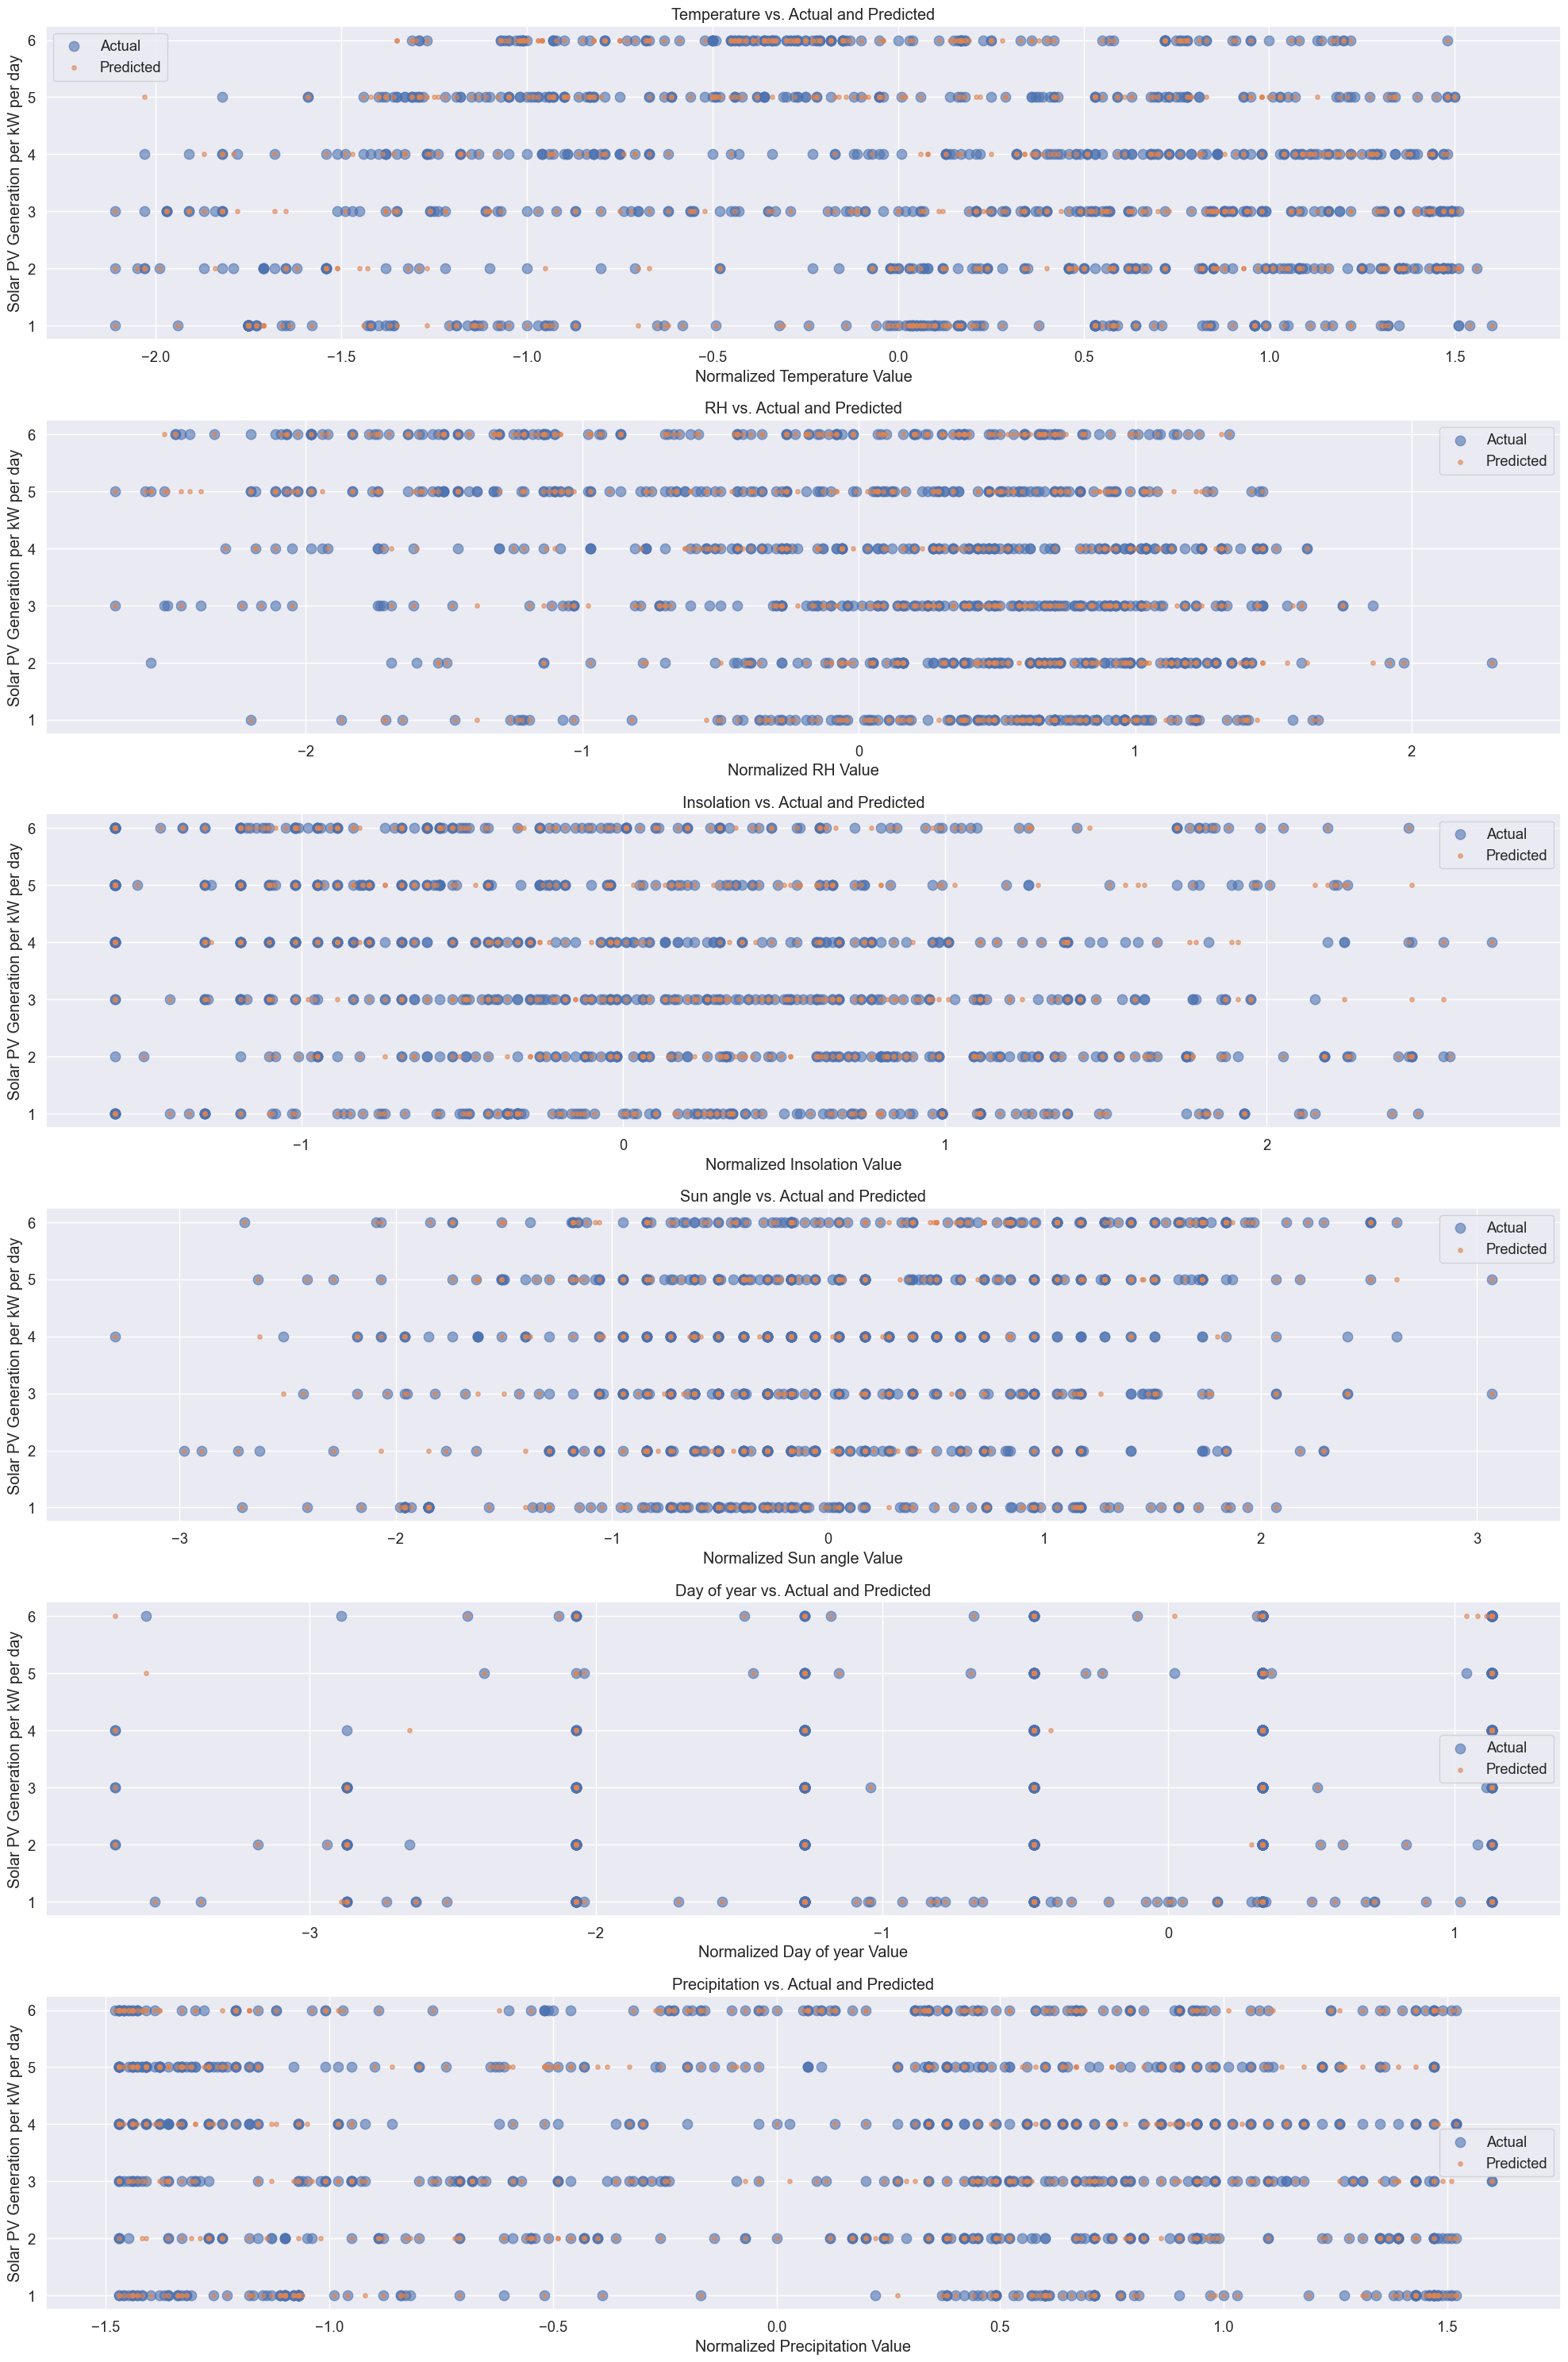

In [53]:
#The output in both test and prediction is one hot encoded 
#reverse the one hot encoding process to get same shape
revohe_predictions = np.argmax(predictions, axis=1)
revohe_predictions = revohe_predictions + 1     #adjusting for changed values after reversing OHE
revohe_y_test = np.argmax(y_test, axis=1)
revohe_y_test = revohe_y_test + 1               #adjusting for changed values after reversing OHE

# Flatten the arrays if they have more than one dimension
flat_predictions = revohe_predictions.flatten()
flat_y_test = revohe_y_test.flatten()

# Sample size for better clarity
sample_size = 1000  # Adjust this size as needed for clarity

# Randomly select a sample of the indices
indices = np.random.choice(len(flat_y_test), size=sample_size, replace=False)

# Sample the data
sample_X_test = X_test[indices]
sample_flat_y_test = flat_y_test[indices]
sample_flat_predictions = flat_predictions[indices]

# Plot each climate parameter vs. actual and predicted values
climate_parameters = ['Temperature', 'RH', 'Insolation', 'Sun angle', 'Day of year', 'Precipitation']
num_parameters = len(climate_parameters)

fig, axes = plt.subplots(num_parameters, 1, figsize=(20, num_parameters*5))

for i, ax in enumerate(axes):
    ax.scatter(sample_X_test[:, i], sample_flat_y_test, alpha=0.6, label='Actual', s=80)
    ax.scatter(sample_X_test[:, i], sample_flat_predictions, alpha=0.6, label='Predicted', s=15)
    ax.set_xlabel(f'Normalized {climate_parameters[i]} Value')
    ax.set_ylabel('Solar PV Generation per kW per day')
    ax.set_title(f'{climate_parameters[i]} vs. Actual and Predicted')
    ax.legend()

plt.tight_layout()
plt.show()

Classification Report

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
# Generate classification report
report = classification_report(flat_y_test, flat_predictions, target_names=[f'Category {i}' for i in np.unique(flat_y_test)])
print(report)

              precision    recall  f1-score   support

  Category 1       0.90      0.90      0.90      1981
  Category 2       0.74      0.67      0.70      1996
  Category 3       0.64      0.68      0.66      2009
  Category 4       0.58      0.40      0.48      1937
  Category 5       0.58      0.63      0.61      1979
  Category 6       0.69      0.86      0.77      1970

    accuracy                           0.69     11872
   macro avg       0.69      0.69      0.68     11872
weighted avg       0.69      0.69      0.69     11872



Scatter Plot

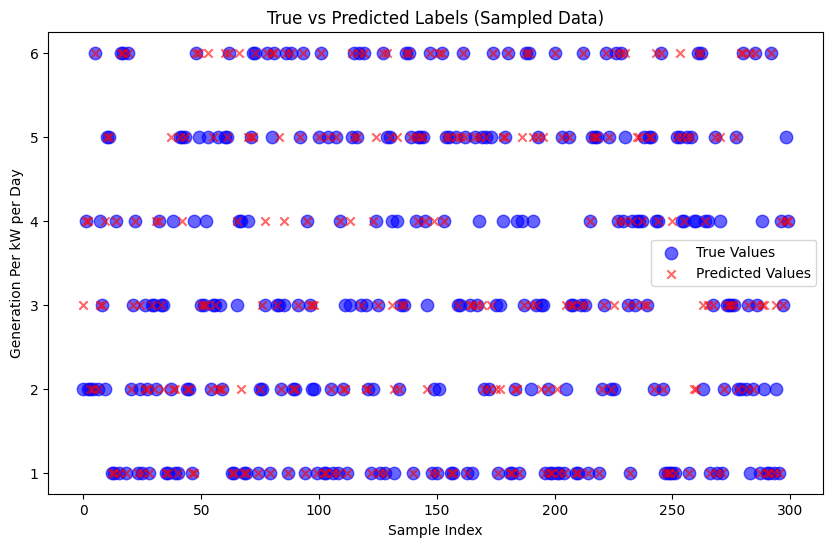

In [46]:
# Plot a sample of data for clarity
sample_size = 300  # Adjust the sample size as needed
indices = np.random.choice(len(flat_y_test), size=sample_size, replace=False)

plt.figure(figsize=(10, 6))
plt.scatter(range(sample_size), flat_y_test[indices], alpha=0.6, label='True Values', marker='o', color='b', s=80)
plt.scatter(range(sample_size), flat_predictions[indices], alpha=0.6, label='Predicted Values', marker='x', color='r')
plt.xlabel('Sample Index')
plt.ylabel('Generation Per kW per Day')
plt.title('True vs Predicted Labels (Sampled Data)')
plt.legend()
plt.show()

Accuracy / Loss Curves

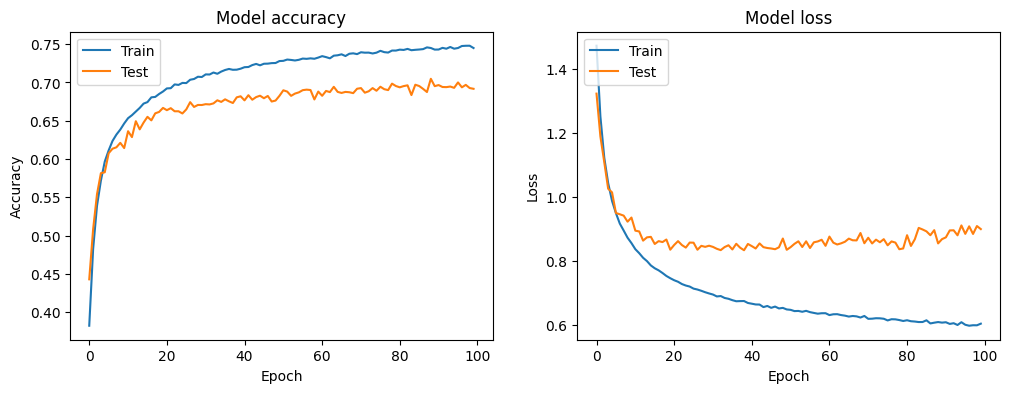

In [47]:
# Assuming `history` is the returned object from `model.fit()`
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(ann.history['loss'])
plt.plot(ann.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Precision-Recall Curve - Not Applicable since its a Multi Class classification - This is used for binary classifications

In [ ]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import average_precision_score
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming y_test and predictions are already defined

# # Binarize the output
# n_classes = y_test.shape[1]
# y_test_binarized = label_binarize(np.argmax(y_test, axis=1), classes=range(n_classes))
# predictions_binarized = label_binarize(np.argmax(predictions, axis=1), classes=range(n_classes))

# # Calculate precision-recall curve for each class
# precision = dict()
# recall = dict()
# average_precision = dict()
# for i in range(n_classes):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], predictions_binarized[:, i])
#     average_precision[i] = average_precision_score(y_test_binarized[:, i], predictions_binarized[:, i])

# # Plot the precision-recall curves for each class
# plt.figure(figsize=(10, 8))
# for i in range(n_classes):
#     plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (area = {average_precision[i]:0.2f})')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve for Each Class')
# plt.legend(loc="best")
# plt.show()


ROC Curve - Only applicable for binary classifications

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming y_test and predictions are already defined
# fpr, tpr, thresholds = roc_curve(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='r', linestyle='--')
# plt.title('ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc='lower right')
# plt.show()

Confusion Matrix 

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


feature_test_data = X_test


label_predict_test_data = model.predict(feature_test_data)
y_label_predict = np.argmax(label_predict_test_data, axis=1)
y_test_data = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_data, y_label_predict)
print('Confusion Matrix:',cm)

  1/371 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
Confusion Matrix: [[1788   71   36   26   35   25]
 [  99 1340  329  129   66   33]
 [  34  251 1359  176  121   68]
 [  37  108  354  777  474  187]
 [  18   39   37  186 1252  447]
 [   9   14   15   38  199 1695]]


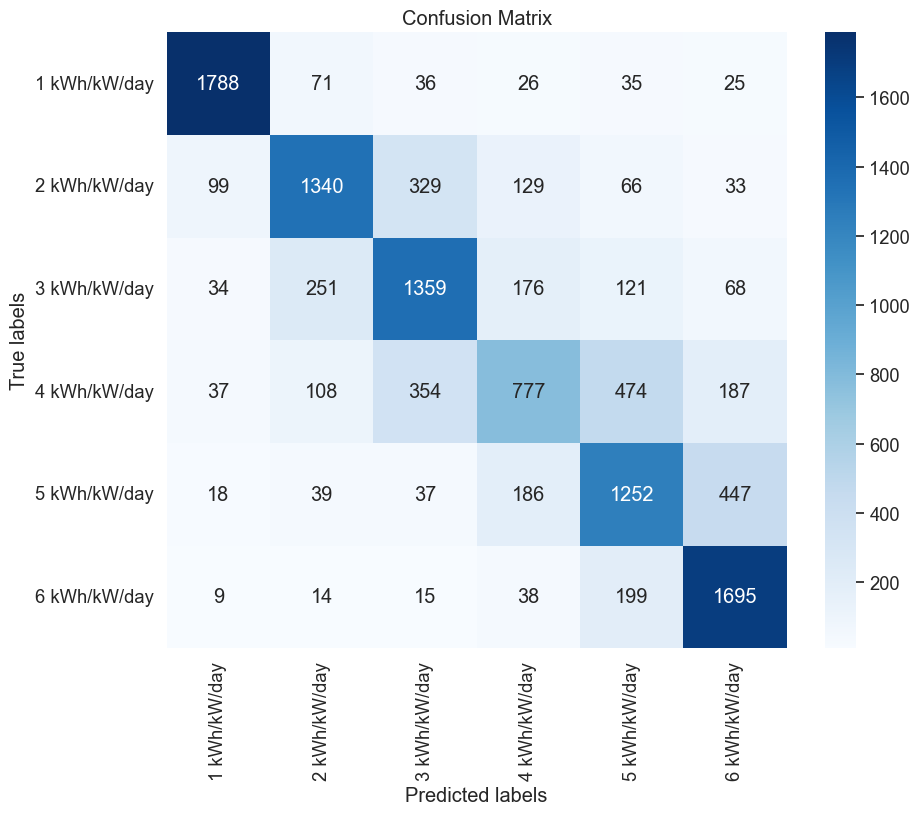

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have the confusion matrix 'cm'

# Define class labels (assuming you have 6 classes)
class_labels = ["1 kWh/kW/day", "2 kWh/kW/day", "3 kWh/kW/day", "4 kWh/kW/day", "5 kWh/kW/day", "6 kWh/kW/day"]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Precision, Recall, and F1 Scores

In [50]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print(precision_score(y_test_data, y_label_predict , average="macro"))
print(recall_score(y_test_data, y_label_predict , average="macro"))
print(f1_score(y_test_data, y_label_predict , average="macro"))

0.6884560407368226
0.6907596180261321
0.684743082643032


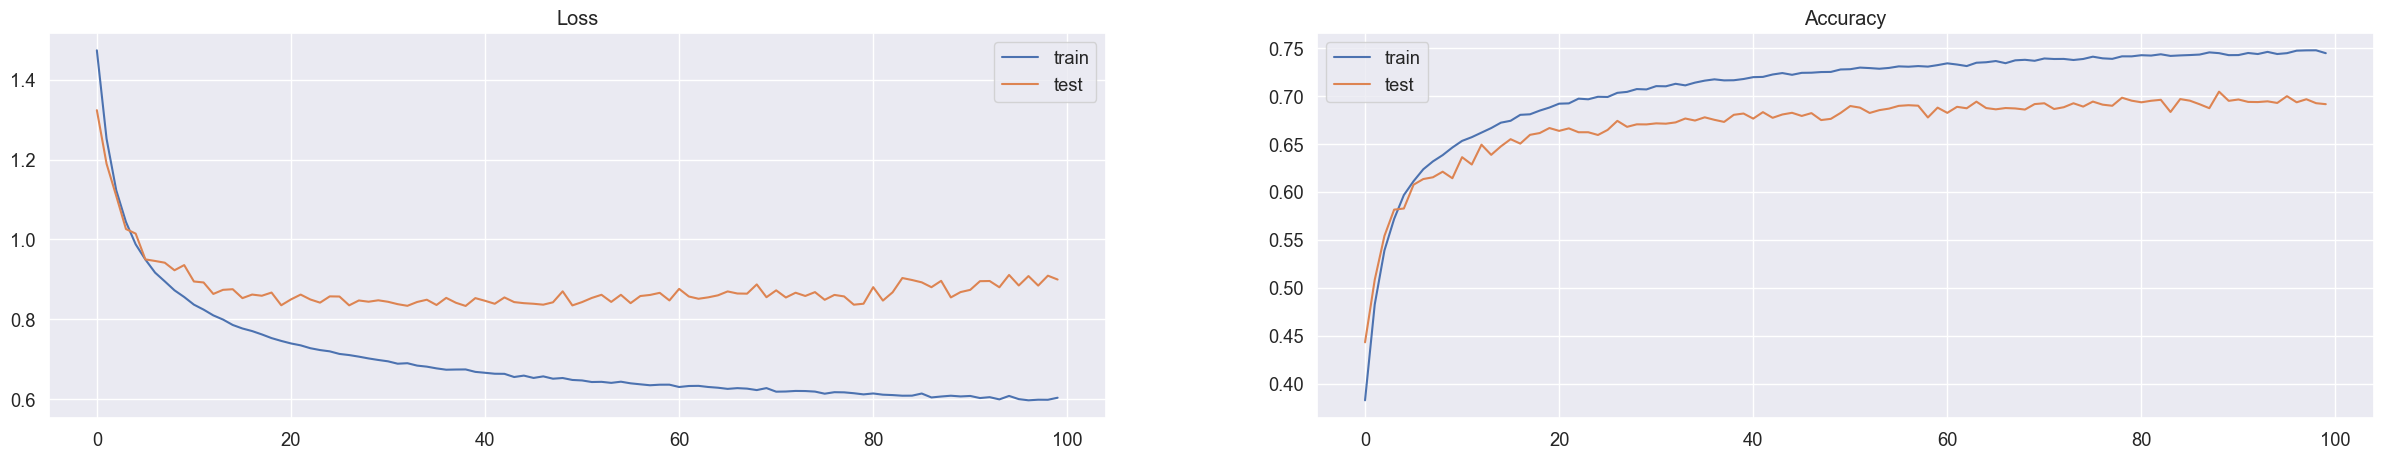

In [51]:
from matplotlib import pyplot

plt.figure(figsize=[30, 5])

pyplot.subplot(121)
pyplot.title('Loss')
pyplot.plot(ann.history['loss'], label='train')
pyplot.plot(ann.history['val_loss'], label='test')
pyplot.legend()

pyplot.subplot(122)
pyplot.title('Accuracy')
pyplot.plot(ann.history['accuracy'], label='train')
pyplot.plot(ann.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()